In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Superstore%20Dataset/Sample%20-%20Superstore.csv", encoding='windows-1252')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [57]:
df=df.drop('Row ID', axis=1)
df.head(5)
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  9994
Number of Columns:  20


In [58]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [59]:
df.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [60]:
df=df.drop('Country', axis=1)
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [61]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [62]:
df['order_ship_time']= df['Ship Date'] - df['Order Date']
df['order_year']= df['Order Date'].dt.year
df['order_month']=df['Order Date'].dt.strftime("%b")
df['order_day']=df['Order Date'].dt.strftime("%a")
df["order_ship_time"]=df['order_ship_time'].dt.days
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,order_ship_time,order_year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175,2015.722233
std,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567,1.123555
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2014.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000,2015.000000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,2016.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000,2017.000000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000,2017.000000


In [63]:
df[df['Profit']<0]['Customer ID'].count()/df['Customer ID'].count()

0.18721232739643787

In [64]:
df.loc[:,'is_profit']=np.where(df['Profit']>0,1,0)

In [65]:
df.dtypes
list_cateog=df.select_dtypes(include='object').columns.tolist()
print("Cateogrical Variables: \n")
list_cateog

Cateogrical Variables: 



['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'order_month',
 'order_day']

In [66]:
list_non_cateog=list(set(df.columns.tolist())- set(list_cateog))
print("Numerical Variables: \n")
list_non_cateog

Numerical Variables: 



['order_ship_time',
 'Profit',
 'Sales',
 'is_profit',
 'Postal Code',
 'Order Date',
 'Discount',
 'Quantity',
 'Ship Date',
 'order_year']

In [67]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def pie_chart(data,var_list,var_title,title,colors):
    
    wp = { 'linewidth' : 2, 'edgecolor' : "green",'antialiased': True }
    tp={'color': 'black', "fontsize":14}
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = var_list,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = tp)
 
    ax.legend(wedges, var_list,
              title =var_title,
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))
 
    plt.setp(autotexts, size = 14)
    plt.axis('equal')
    ax.set_title(title, weight='bold',size=16)
     
    plt.show()
        
def hist_plot(df,yvar,ylabel,title):
    plt.figure(figsize=(10,8))
    plt.ylabel(ylabel,size=13)
    plt.hist(np.array(df[yvar]), color='red')
    plt.title(title, size=15,  weight='bold')
    plt.show()

def box_plot(df,yvar, title):
    sns.boxplot(df[yvar])
    plt.title(title,size=15,weight='bold')
    plt.show()
def box_hist_plot(df,yvar,title,yll):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .55)})

    sns.boxplot(df[yvar], ax=ax_box)
    sns.distplot(df[yvar],  kde=False, hist_kws=dict(ec="k"),ax=ax_hist)
    ax_box.set(xlabel='')
    ax_box.set(title=title)
    ax_hist.set(ylabel=yll)
    plt.show()
def plot_bar(df,yvar, xvar, ylabel, xlabel, title):
    y_pos=np.arange(len(df[yvar]))
    plt.figure(figsize=(10,8))
    plt.bar(y_pos,df[xvar], align='center', alpha=0.5, color='red')
    plt.xticks(y_pos, df[yvar],rotation='vertical', size=14)
    plt.yticks(size=14)
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    plt.title(title, size=16, color='black')
    plt.show()  
def count_plot(df,yvar, xvar,var, title):
    plt.figure(figsize=(12,8))
    sns.countplot(df[var], order=df[var].value_counts().index)
    plt.ylabel(yvar, size=14)
    plt.xlabel(xvar, size=14)
    plt.yticks(size=14)
    plt.xticks(size=14,rotation='vertical')
    plt.title(title, size=16, weight='bold')
    plt.show()

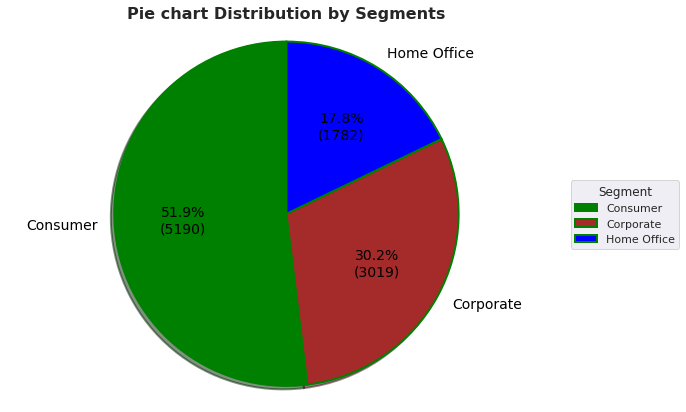

In [68]:
df['Segment'].value_counts()
colors=("green", "brown", "blue")
pie_chart(df['Segment'].value_counts().reset_index()['Segment'],df['Segment'].value_counts().reset_index()['index'],"Segment","Pie chart Distribution by Segments",colors)

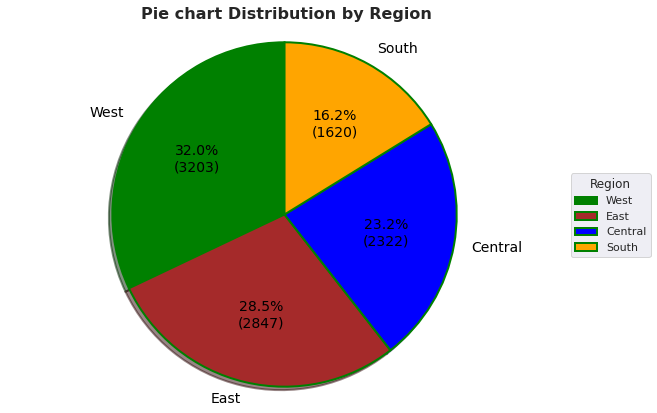

In [69]:
df['Region'].value_counts()
colors=("green", "brown", "blue", 'orange')
pie_chart(df['Region'].value_counts().reset_index()['Region'],df['Region'].value_counts().reset_index()['index'],"Region","Pie chart Distribution by Region",colors)

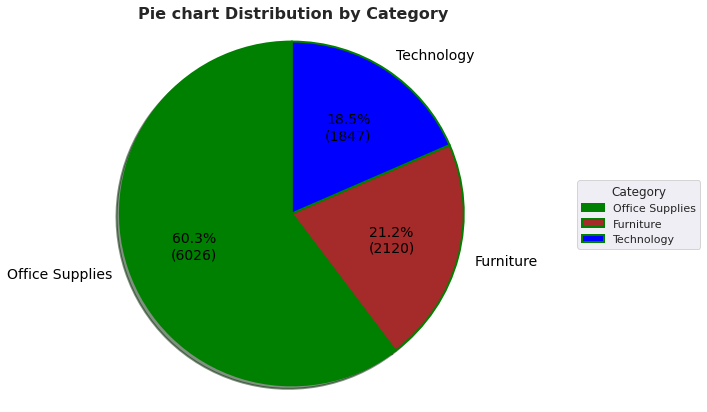

In [70]:
df['Category'].value_counts()
colors=("green", "brown", "blue")
pie_chart(df['Category'].value_counts().reset_index()['Category'],df['Category'].value_counts().reset_index()['index'],"Category","Pie chart Distribution by Category",colors)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


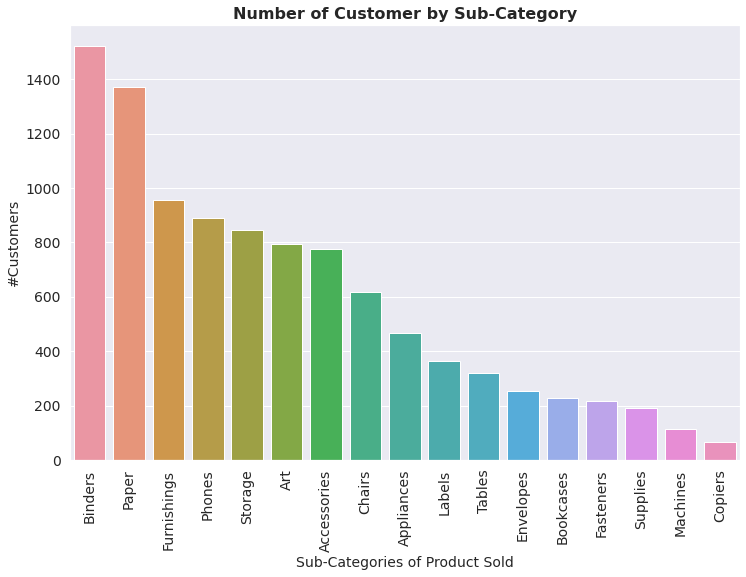

In [71]:
df['Sub-Category'].value_counts()
count_plot(df,'#Customers', 'Sub-Categories of Product Sold','Sub-Category','Number of Customer by Sub-Category')

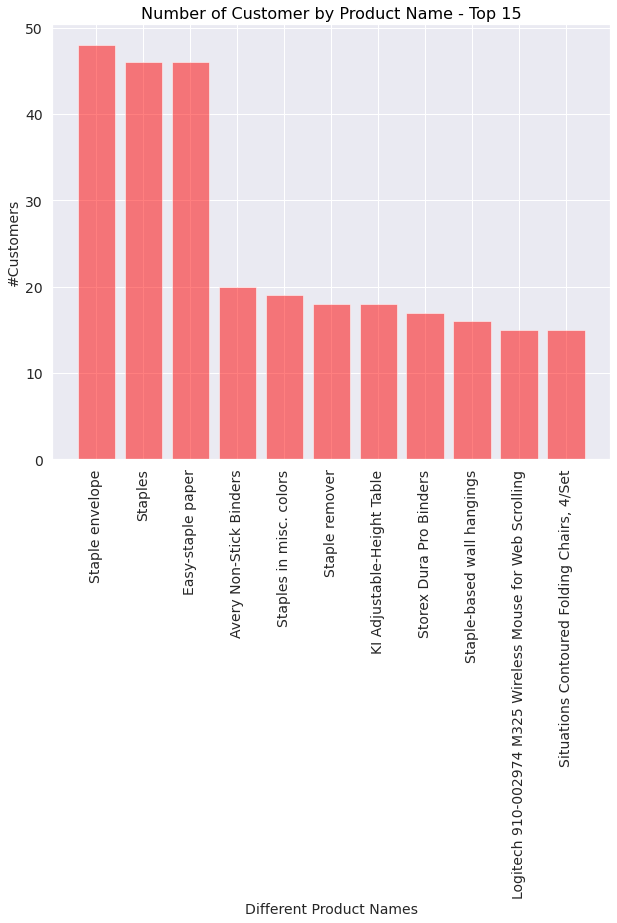

In [72]:
df['Product Name'].nunique()
product_freq=df['Product Name'].value_counts().reset_index()
plot_bar(product_freq[product_freq['Product Name'] >= 15],'index', 'Product Name', '#Customers', 'Different Product Names', 'Number of Customer by Product Name - Top 15')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


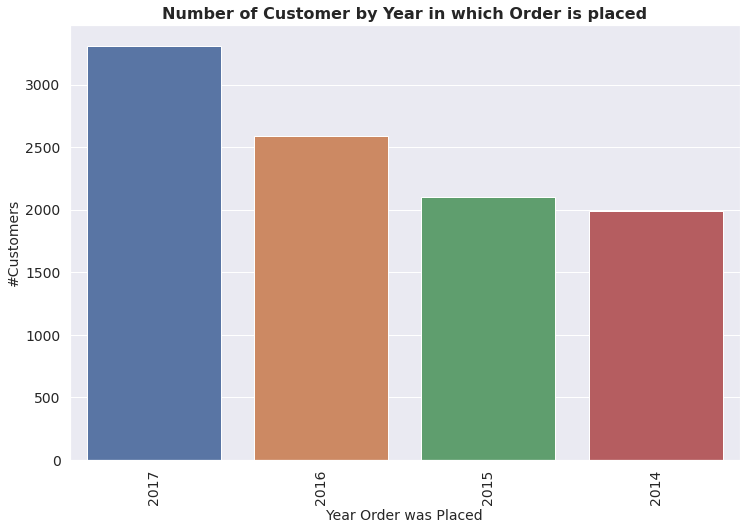

In [73]:
df['order_year'].value_counts()
count_plot(df,'#Customers', 'Year Order was Placed','order_year','Number of Customer by Year in which Order is placed')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


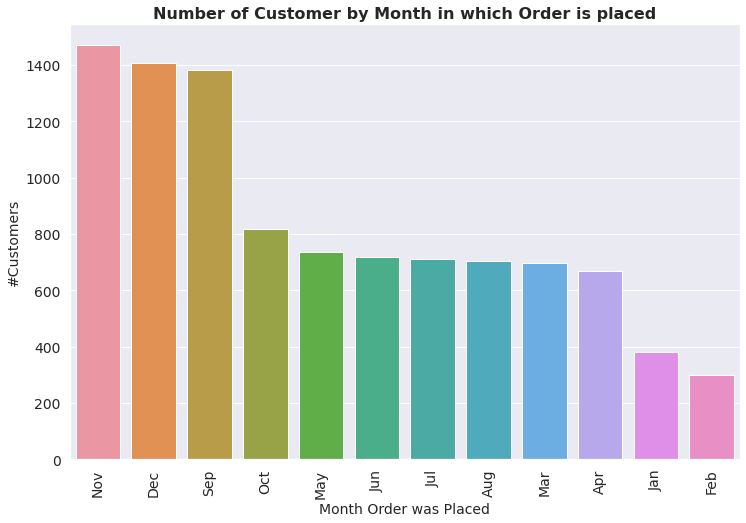

In [74]:
df['order_month'].value_counts()
count_plot(df,'#Customers', 'Month Order was Placed','order_month','Number of Customer by Month in which Order is placed')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


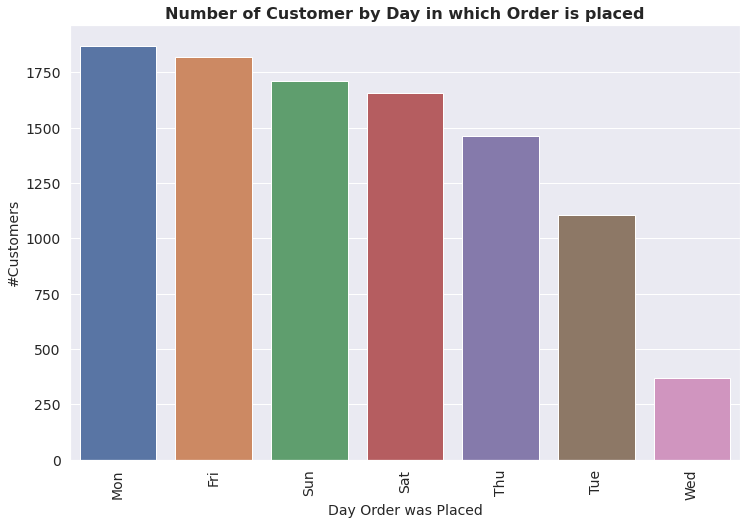

In [75]:
df['order_day'].value_counts()
count_plot(df,'#Customers', 'Day Order was Placed','order_day','Number of Customer by Day in which Order is placed')

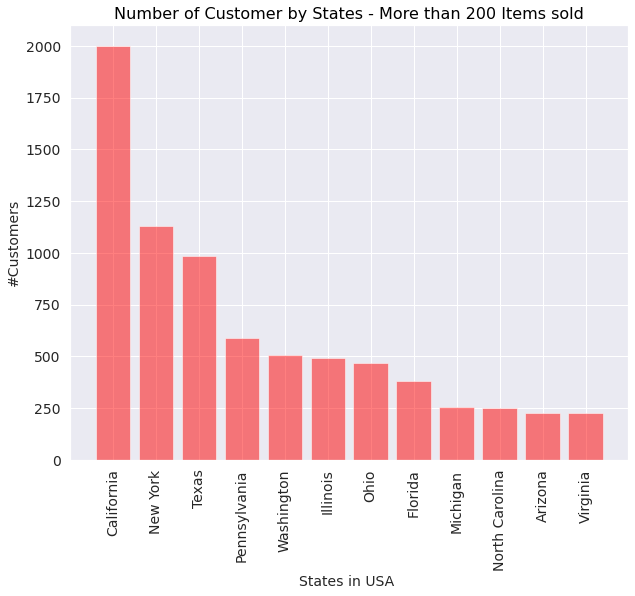

In [76]:
df['State'].value_counts()
state_freq=df['State'].value_counts().reset_index()
state_freq[state_freq['State'] >= 200]
plot_bar(state_freq[state_freq['State'] >= 200],'index', 'State', '#Customers', 'States in USA ', 'Number of Customer by States - More than 200 Items sold')

In [77]:
df["Sales"].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


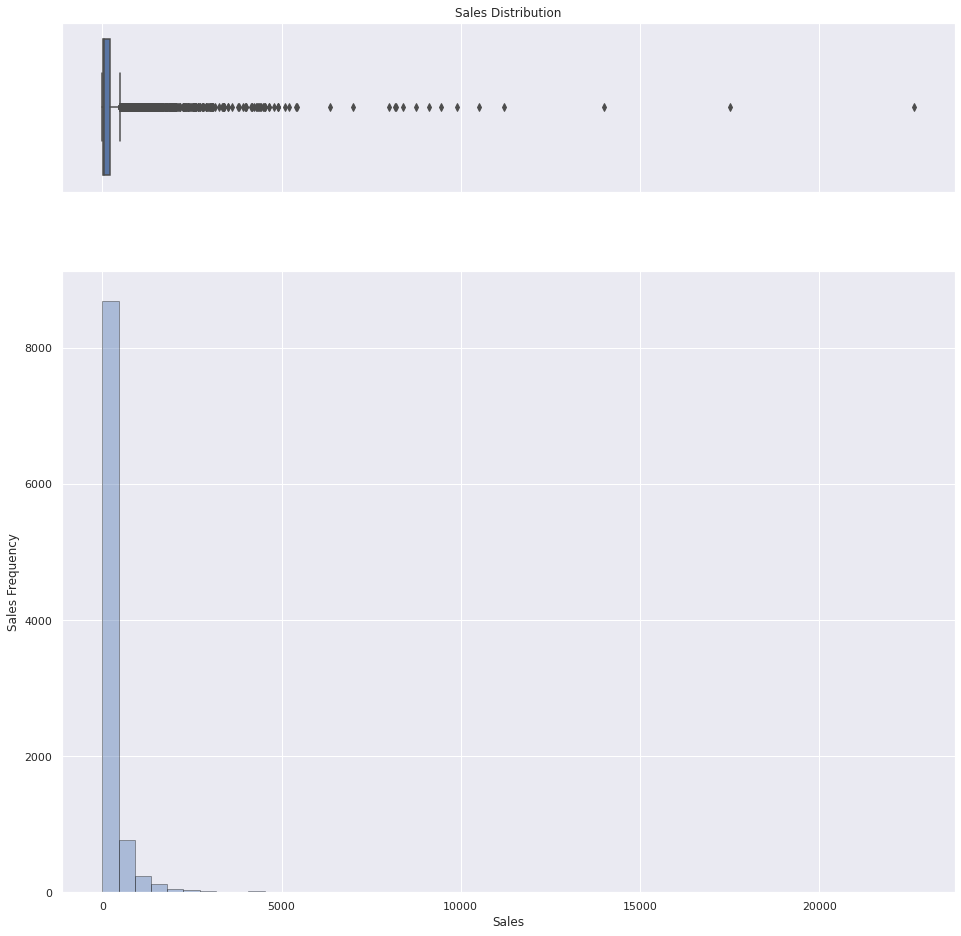

In [78]:
box_hist_plot(df,"Sales","Sales Distribution","Sales Frequency")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


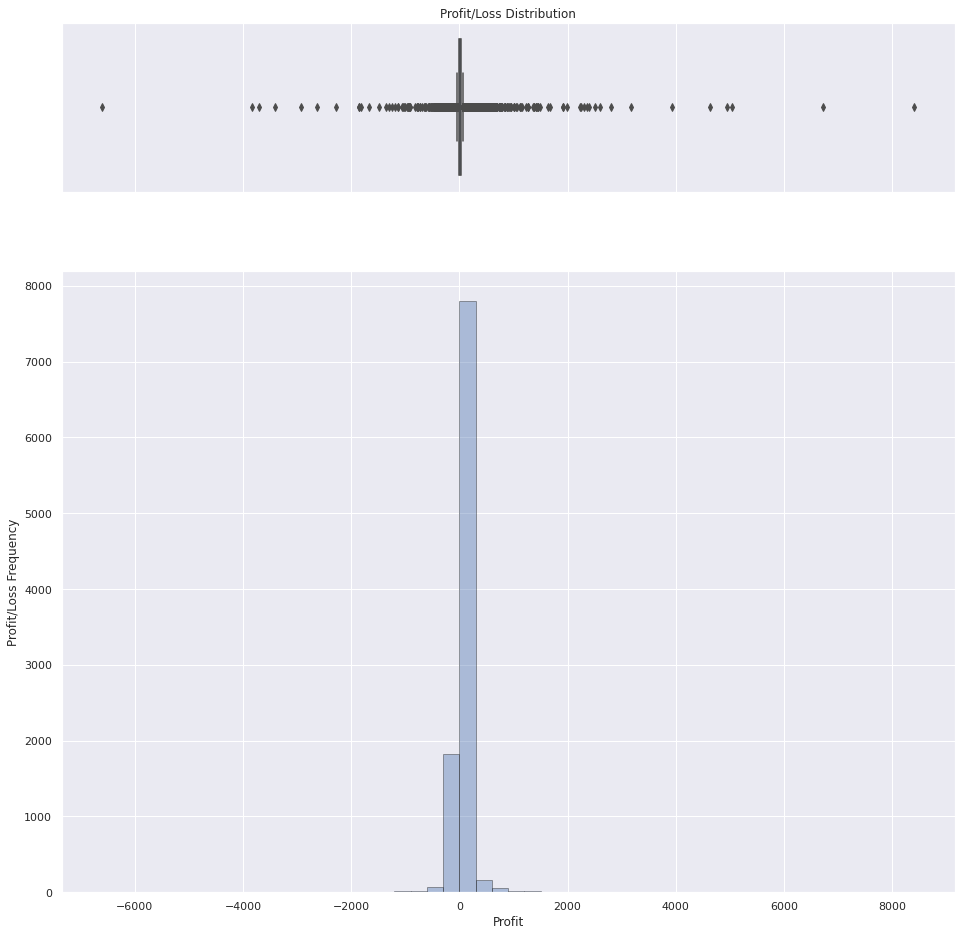

In [79]:
df['Profit'].describe()
box_hist_plot(df,"Profit","Profit/Loss Distribution","Profit/Loss Frequency")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


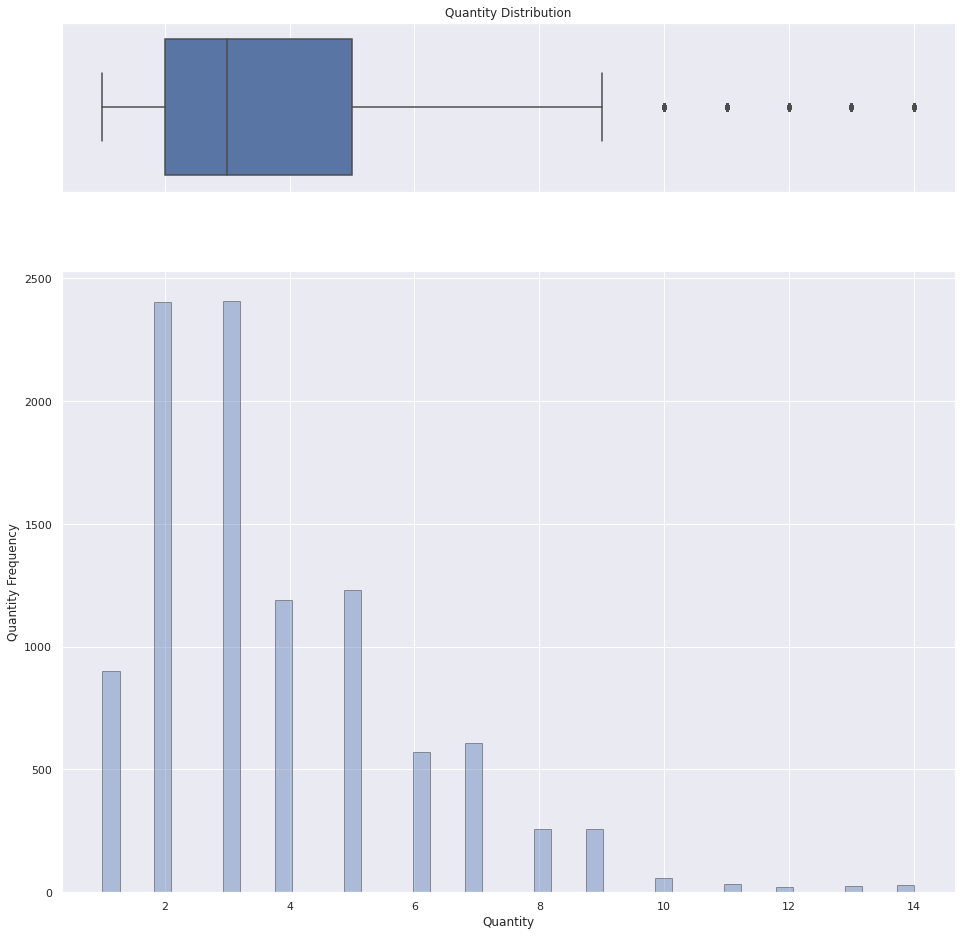

In [80]:
df['Quantity'].describe()
box_hist_plot(df,"Quantity","Quantity Distribution","Quantity Frequency")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


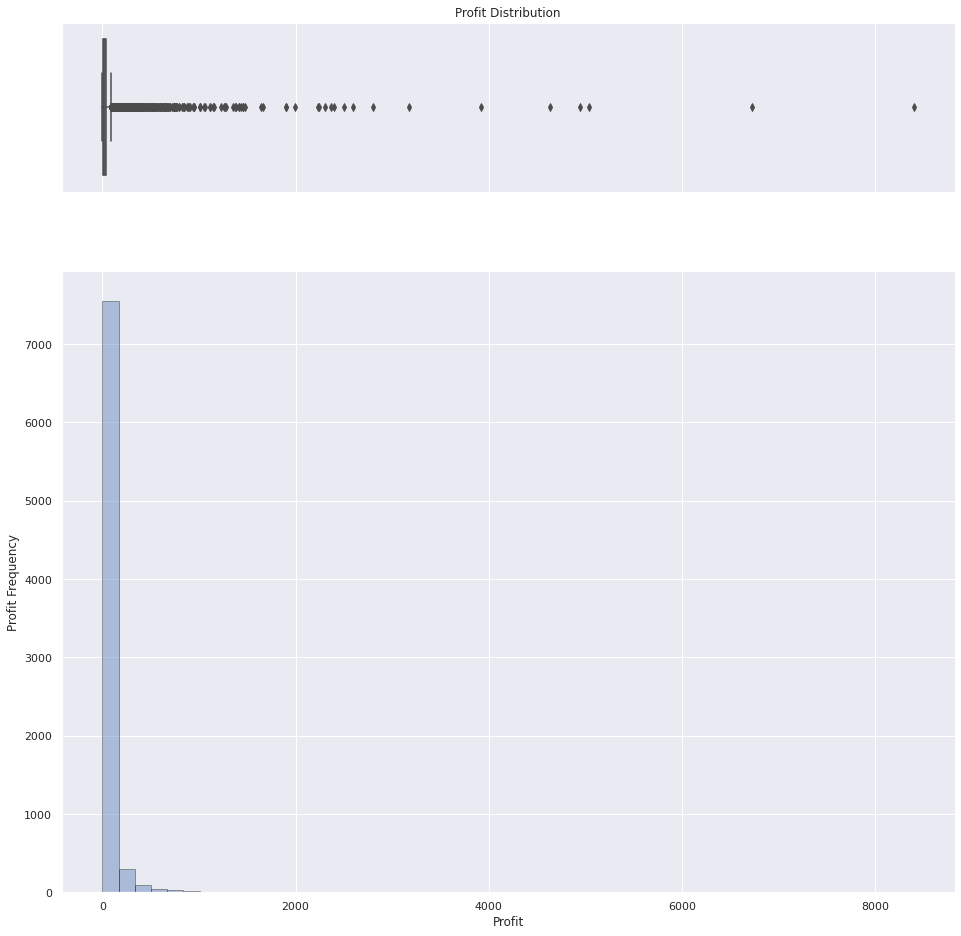

In [81]:
df[df['is_profit'] ==1]['Profit'].describe()
box_hist_plot(df[df['is_profit'] ==1],'Profit','Profit Distribution','Profit Frequency')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


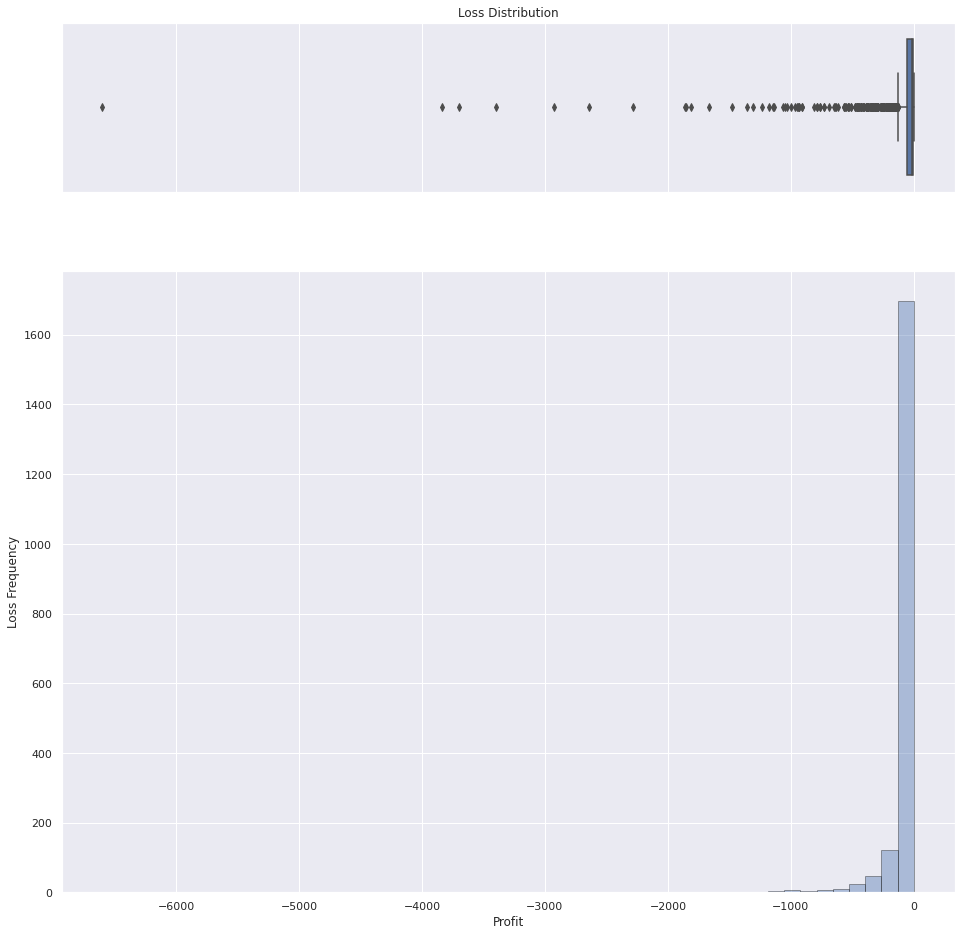

In [82]:
df[df['is_profit'] ==0]['Profit'].describe()
box_hist_plot(df[df['is_profit'] ==0],'Profit','Loss Distribution','Loss Frequency')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


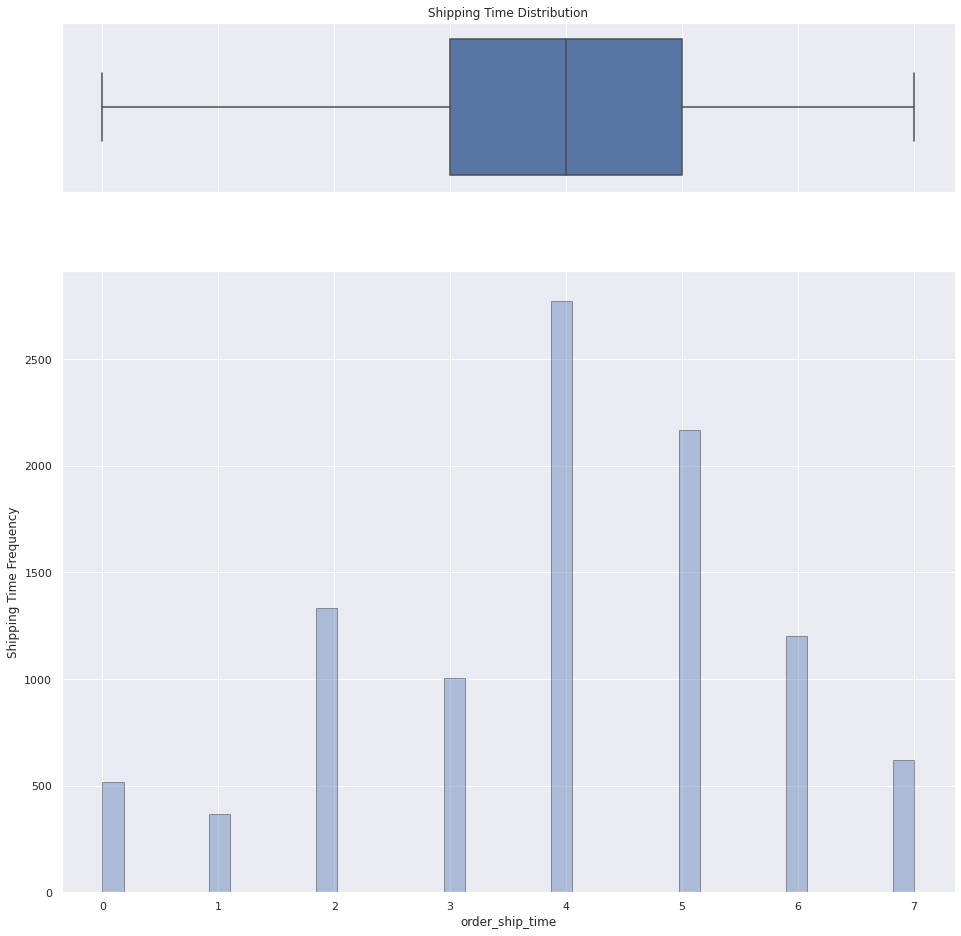

In [83]:
df['order_ship_time'].describe()
box_hist_plot(df,"order_ship_time","Shipping Time Distribution","Shipping Time Frequency")

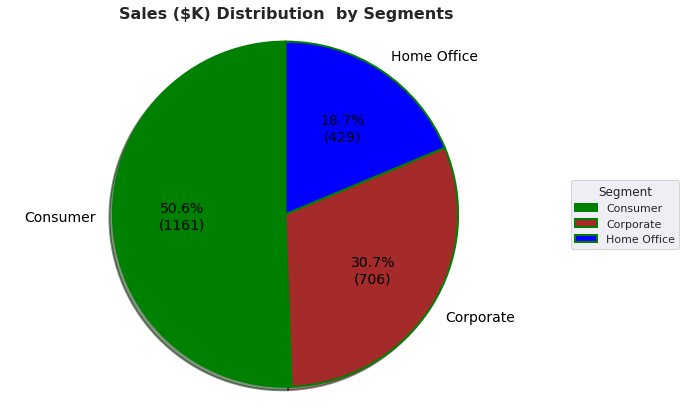

In [84]:
def group_plot(df,var1,var2):
    df1=df.groupby(var1)[var2].sum()
    df1=df1.reset_index()
    df1.rename(columns={var2:'Total Sales'}, inplace=True)
    df1.sort_values(by=['Total Sales'], ascending=False, inplace=True)
    df1.reset_index(drop=True, inplace=True)
    df1['Total Sales'] = df1['Total Sales']/1000
    return df1
df['Segment'].nunique()
segment_sales=group_plot(df,'Segment','Sales') 
colors=("green", "brown", "blue")
pie_chart(segment_sales['Total Sales'],segment_sales['Segment'],"Segment","Sales ($K) Distribution  by Segments",colors)

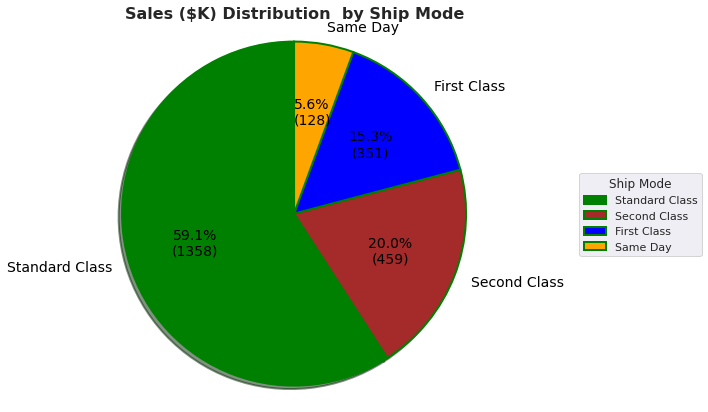

In [85]:
df['Ship Mode'].nunique()
shipping_sales=group_plot(df,'Ship Mode','Sales') 
colors=("green", "brown", "blue", 'orange')
pie_chart(shipping_sales['Total Sales'],shipping_sales['Ship Mode'],"Ship Mode","Sales ($K) Distribution  by Ship Mode",colors)

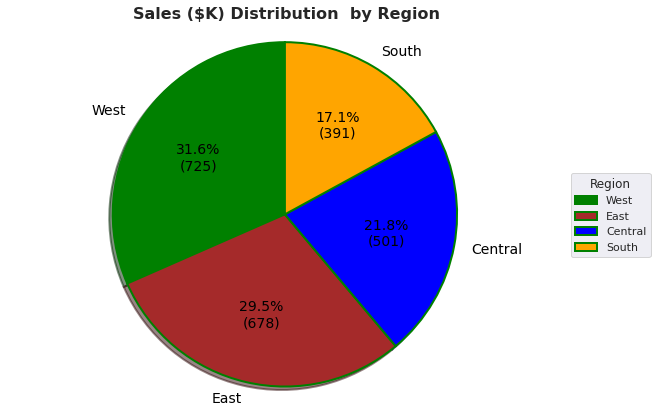

In [86]:
region_sales=group_plot(df,'Region','Sales') 
colors=("green", "brown", "blue", 'orange')
pie_chart(region_sales['Total Sales'],region_sales['Region'],"Region","Sales ($K) Distribution  by Region",colors)

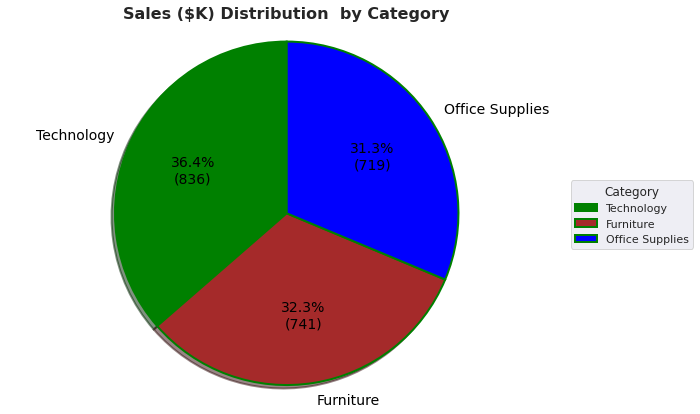

In [87]:
category_sales=group_plot(df,'Category','Sales') 
colors=("green", "brown", "blue")
pie_chart(category_sales['Total Sales'],category_sales['Category'],"Category","Sales ($K) Distribution  by Category",colors)

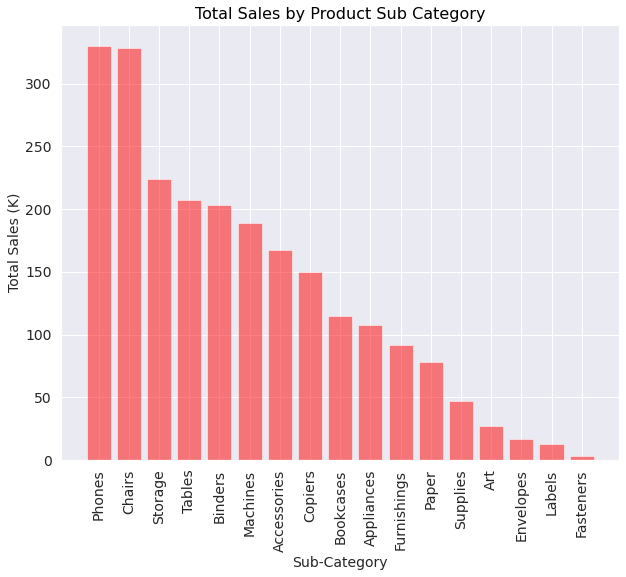

In [88]:
sub_category_sales=group_plot(df,'Sub-Category','Sales') 
plot_bar(sub_category_sales,'Sub-Category','Total Sales','Total Sales (K)','Sub-Category','Total Sales by Product Sub Category')

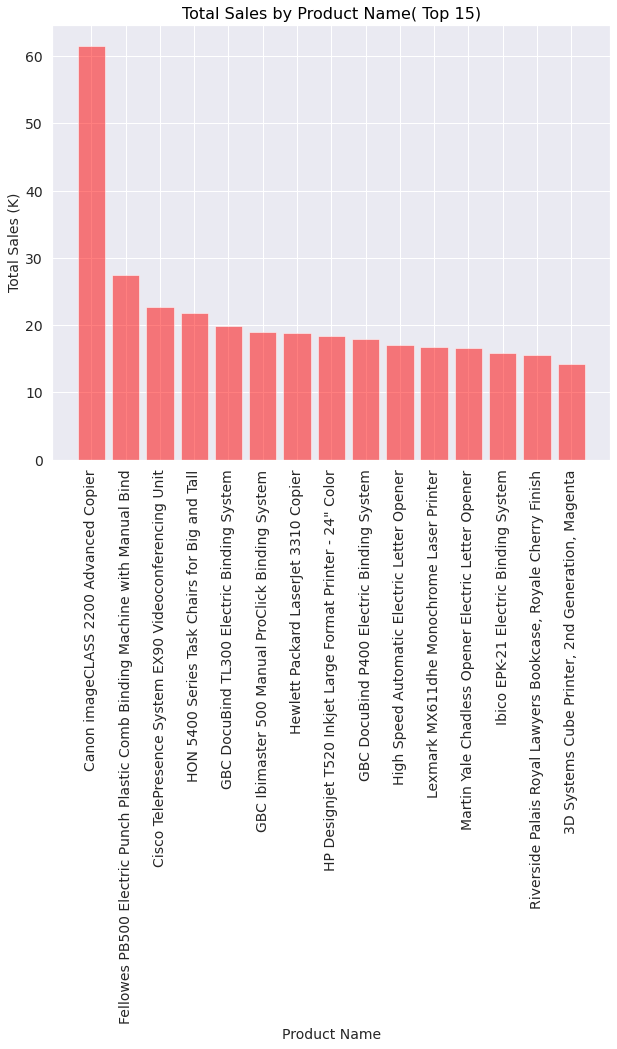

In [89]:
prod_name_sales=group_plot(df,'Product Name','Sales') 
plot_bar(prod_name_sales[0:15],'Product Name','Total Sales','Total Sales (K)','Product Name','Total Sales by Product Name( Top 15)')

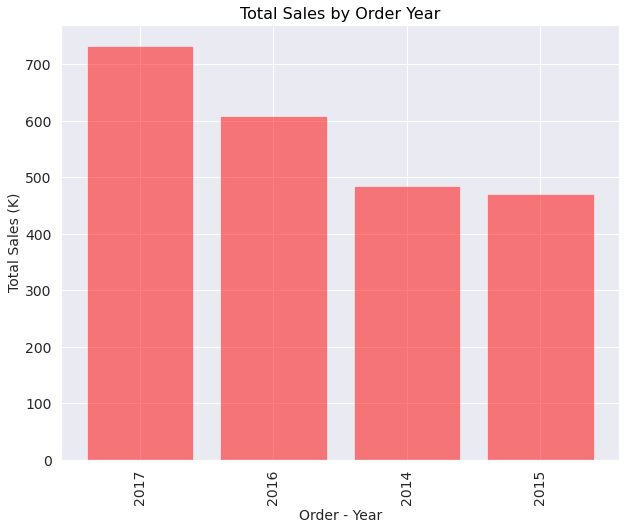

In [90]:
order_year_sales=group_plot(df,'order_year','Sales') 
plot_bar(order_year_sales,'order_year','Total Sales','Total Sales (K)','Order - Year','Total Sales by Order Year')

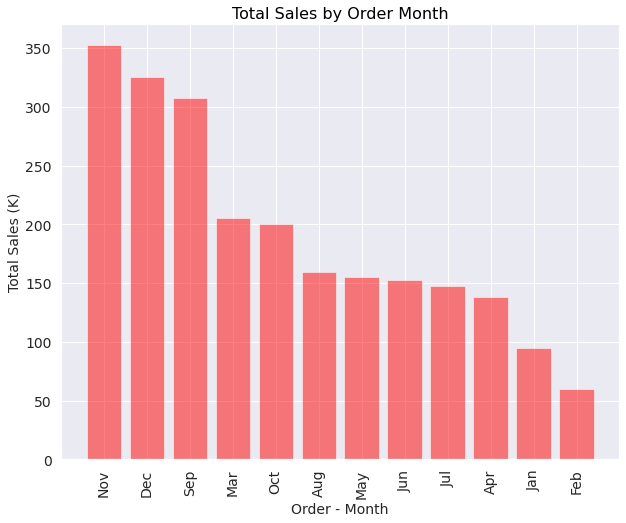

In [91]:
order_month_sales=group_plot(df,'order_month','Sales') 
plot_bar(order_month_sales,'order_month','Total Sales','Total Sales (K)','Order - Month','Total Sales by Order Month')

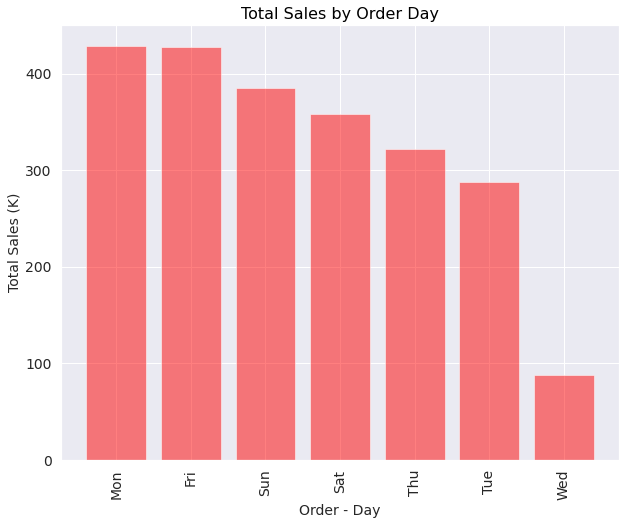

In [92]:
order_day_sales=group_plot(df,'order_day','Sales') 
plot_bar(order_day_sales,'order_day','Total Sales','Total Sales (K)','Order - Day','Total Sales by Order Day')

In [93]:
corr=df[['Discount','Sales','Profit', 'Quantity','order_ship_time']].corr()
corr.style.background_gradient(cmap='coolwarm')
print("correlation Matrix: \n",corr)

correlation Matrix: 
                  Discount     Sales    Profit  Quantity  order_ship_time
Discount         1.000000 -0.028190 -0.219487  0.008623         0.000408
Sales           -0.028190  1.000000  0.479064  0.200795        -0.007354
Profit          -0.219487  0.479064  1.000000  0.066253        -0.004649
Quantity         0.008623  0.200795  0.066253  1.000000         0.018298
order_ship_time  0.000408 -0.007354 -0.004649  0.018298         1.000000


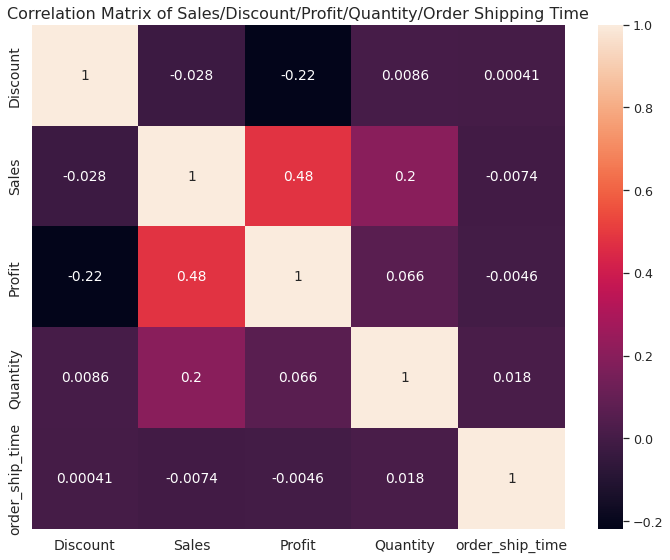

In [94]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10,8))
plt.title("Correlation Matrix of Sales/Discount/Profit/Quantity/Order Shipping Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.show()

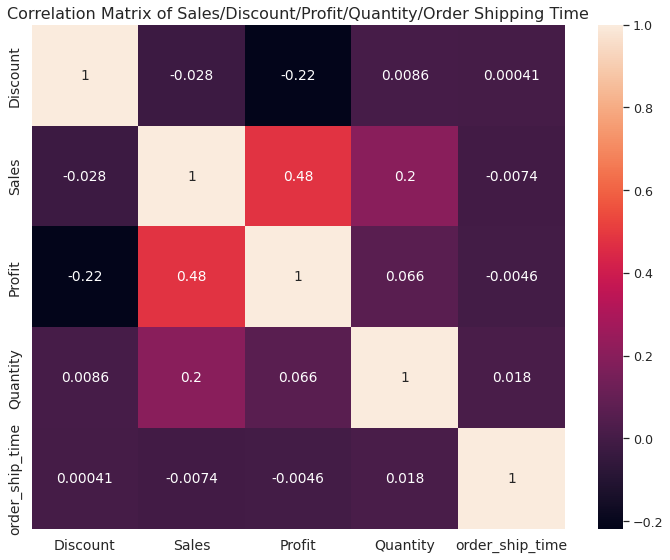

In [95]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10,8))
plt.title("Correlation Matrix of Sales/Discount/Profit/Quantity/Order Shipping Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.show()

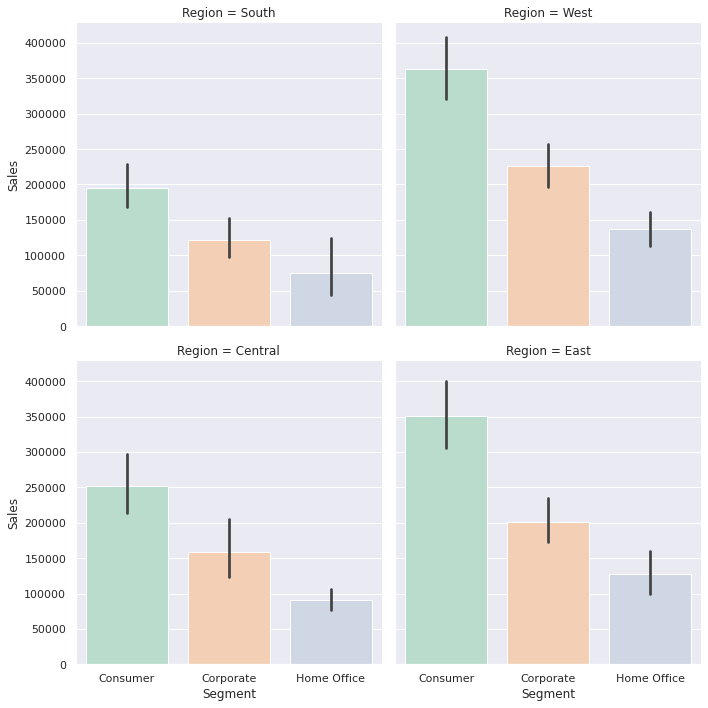

In [96]:
sns.set(rc={"figure.figsize":(20, 20)}) #width=3, #height=4
g=sns.catplot(x="Segment", y="Sales",col="Region",col_wrap=2, data=df, kind="bar",height=5, aspect=1, estimator=sum,palette="Pastel2")

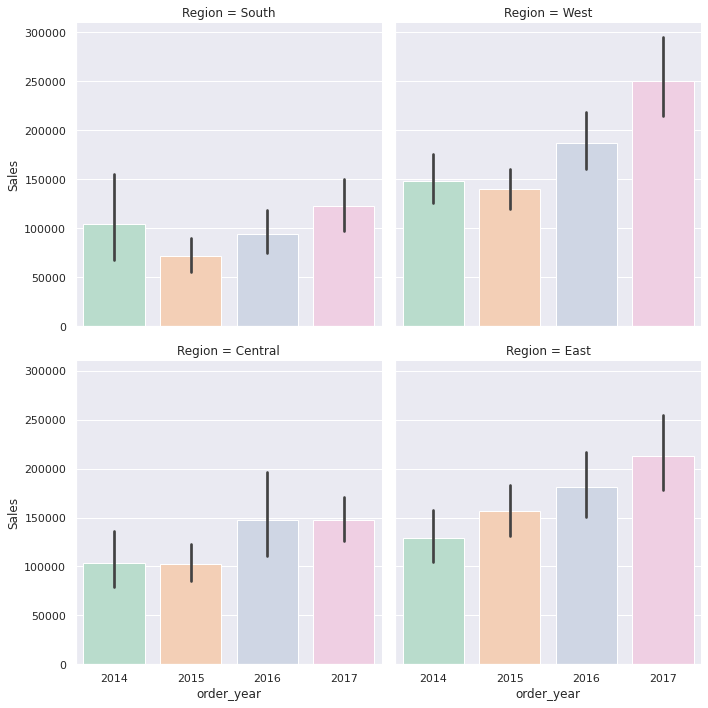

In [97]:
sns.set(rc={"figure.figsize":(20, 20)}) 
g=sns.catplot(x="order_year", y="Sales",col="Region",col_wrap=2, data=df, kind="bar",height=5, aspect=1, estimator=sum,palette="Pastel2")

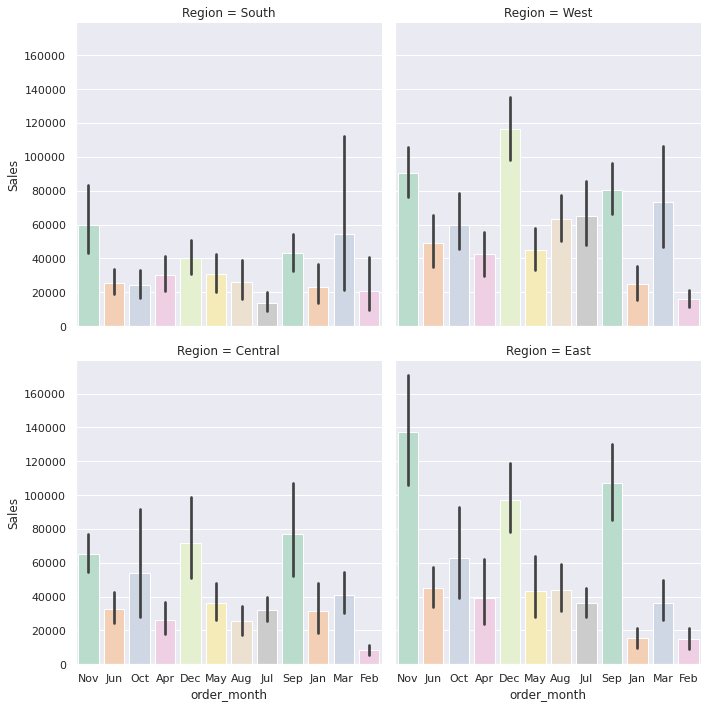

In [98]:
sns.set(rc={"figure.figsize":(20, 20)}) 
g=sns.catplot(x="order_month", y="Sales",col="Region",col_wrap=2, data=df, kind="bar",height=5, aspect=1, estimator=sum,palette="Pastel2")

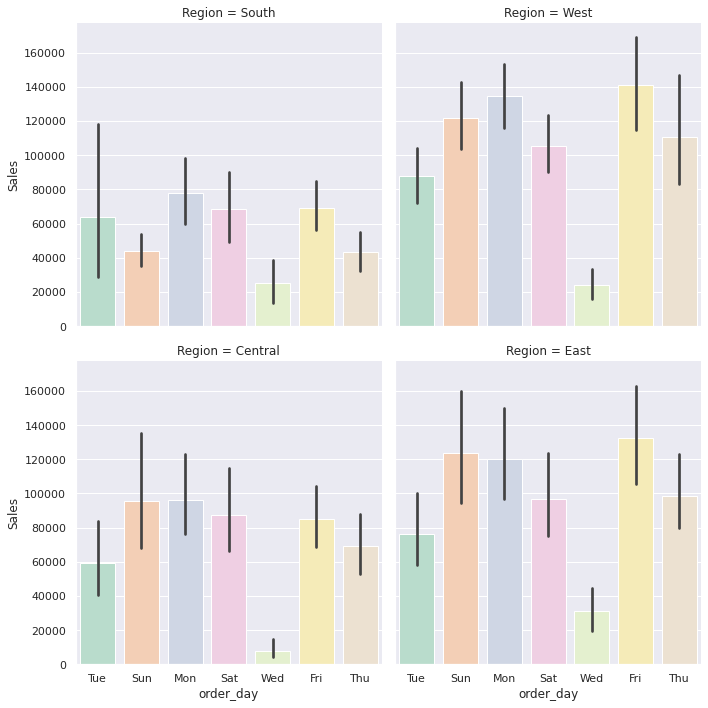

In [99]:
sns.set(rc={"figure.figsize":(20, 20)}) 
g=sns.catplot(x="order_day", y="Sales",col="Region",col_wrap=2, data=df, kind="bar",height=5, aspect=1, estimator=sum,palette="Pastel2")

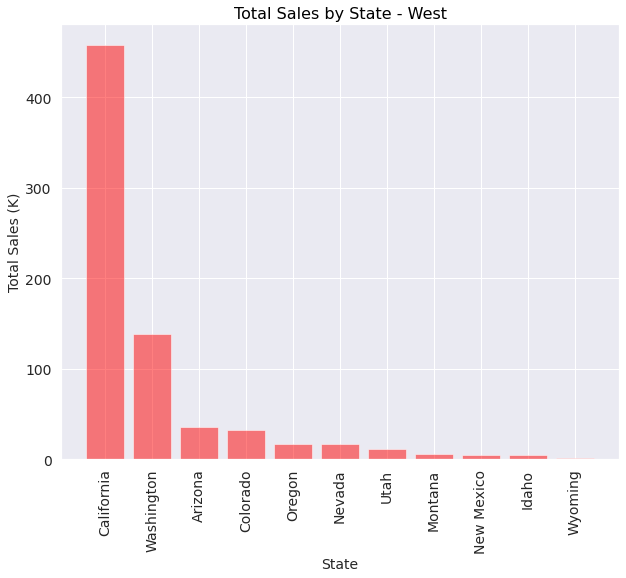

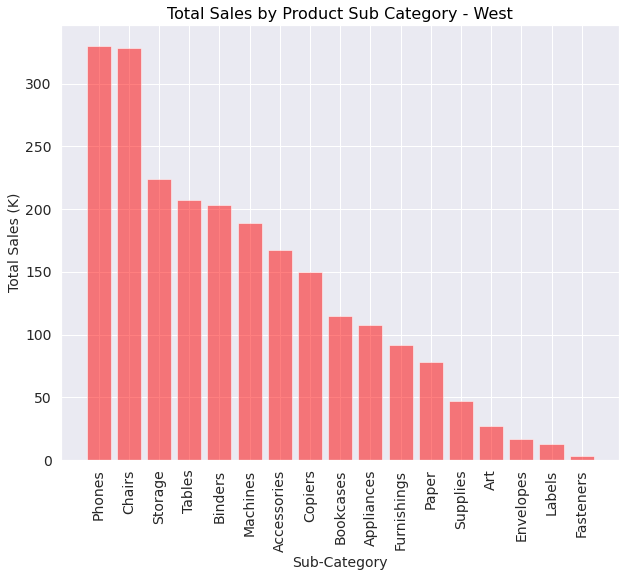

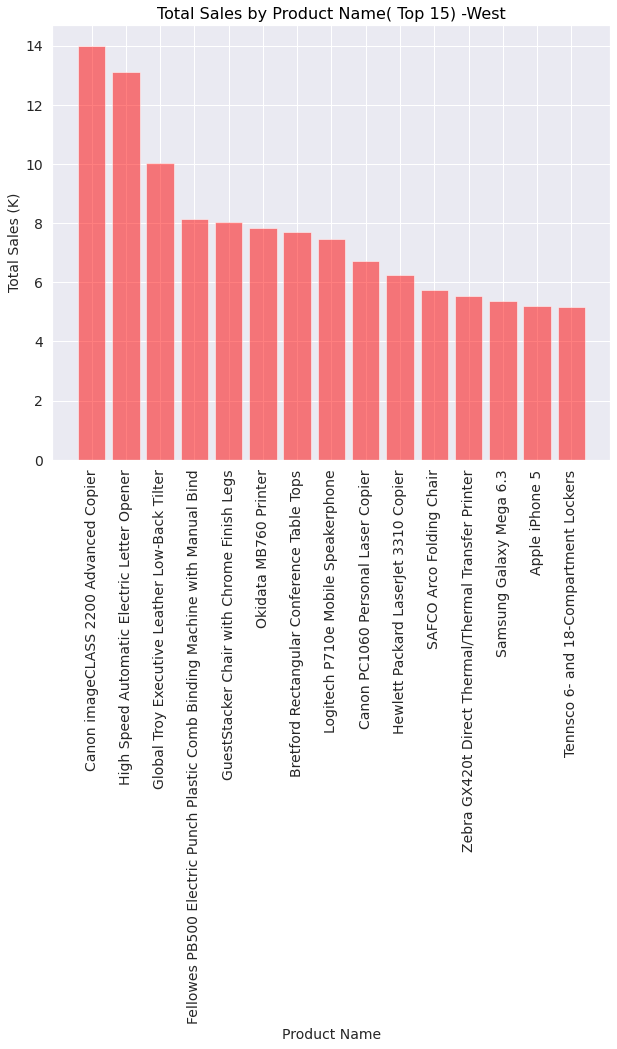

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


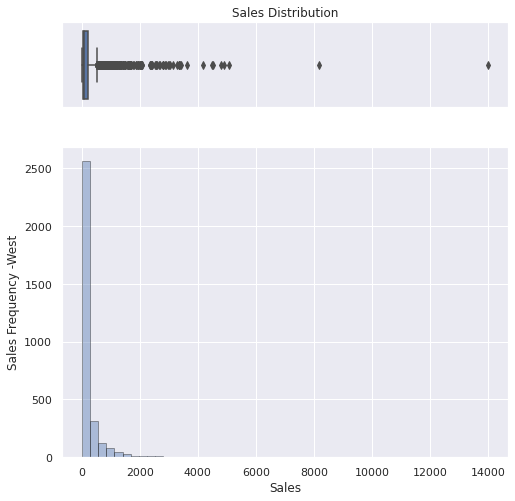

In [100]:
regions=region_sales['Region'].tolist()
sns.set(rc={"figure.figsize":(8, 8)}) #width=3, #height=4
df_regions=df[df['Region'] == regions[0]]
segment_sales=group_plot(df_regions,'State','Sales') 
plot_bar(segment_sales,'State','Total Sales','Total Sales (K)','State','Total Sales by State - '+ regions[0] )

sub_category_sales=group_plot(df,'Sub-Category','Sales') 
    
plot_bar(sub_category_sales,'Sub-Category','Total Sales','Total Sales (K)','Sub-Category','Total Sales by Product Sub Category - '+ regions[0])
    
    
prod_name_sales=group_plot(df_regions,'Product Name','Sales') 
    
plot_bar(prod_name_sales[0:15],'Product Name','Total Sales','Total Sales (K)','Product Name','Total Sales by Product Name( Top 15) -' + regions[0])

box_hist_plot(df_regions,"Sales","Sales Distribution","Sales Frequency -"+ regions[0])

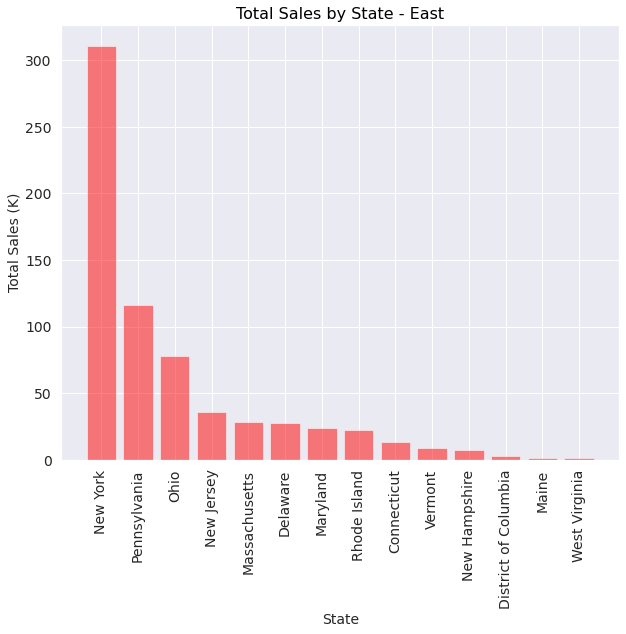

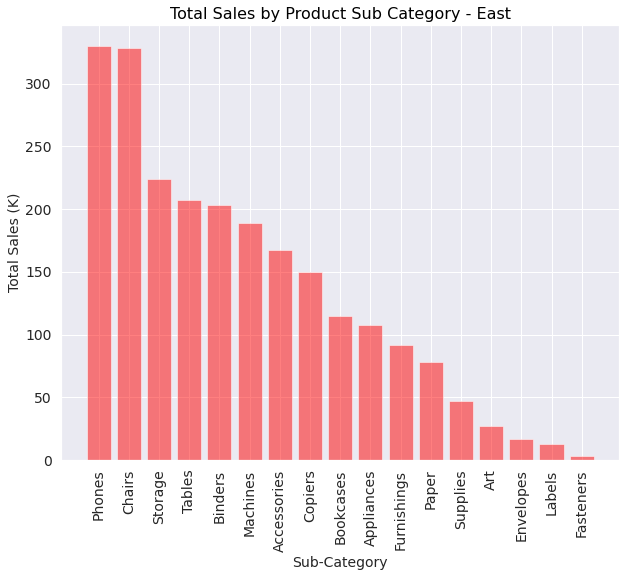

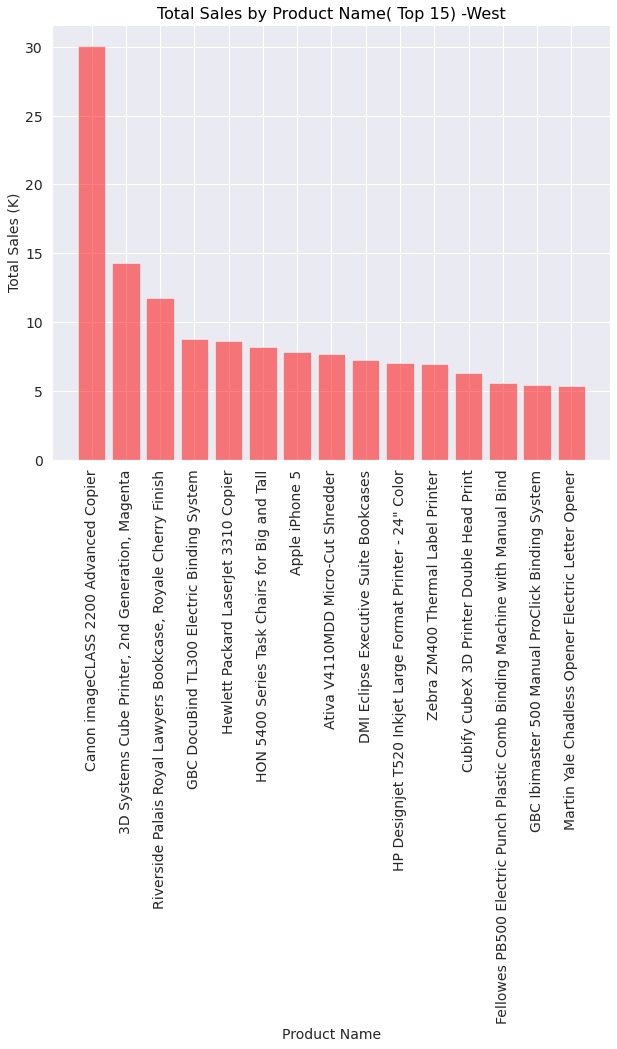

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


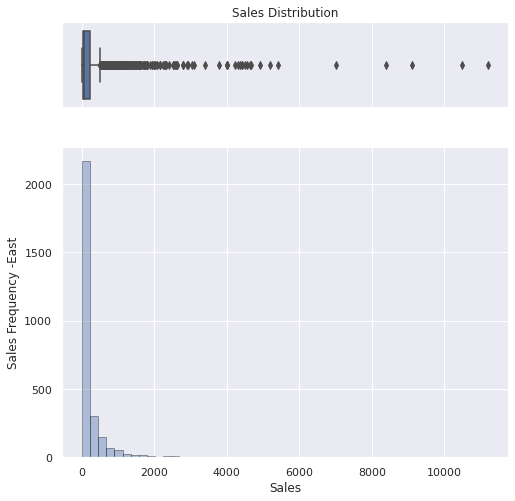

In [101]:
sns.set(rc={"figure.figsize":(8, 8)}) 
df_regions=df[df['Region'] == regions[1]]
segment_sales=group_plot(df_regions,'State','Sales') 
plot_bar(segment_sales,'State','Total Sales','Total Sales (K)','State','Total Sales by State - '+ regions[1] )
sub_category_sales=group_plot(df,'Sub-Category','Sales') 
    
plot_bar(sub_category_sales,'Sub-Category','Total Sales','Total Sales (K)','Sub-Category','Total Sales by Product Sub Category - '+ regions[1])

prod_name_sales=group_plot(df_regions,'Product Name','Sales') 
    
plot_bar(prod_name_sales[0:15],'Product Name','Total Sales','Total Sales (K)','Product Name','Total Sales by Product Name( Top 15) -' + regions[0])

box_hist_plot(df_regions,"Sales","Sales Distribution","Sales Frequency -"+ regions[1])

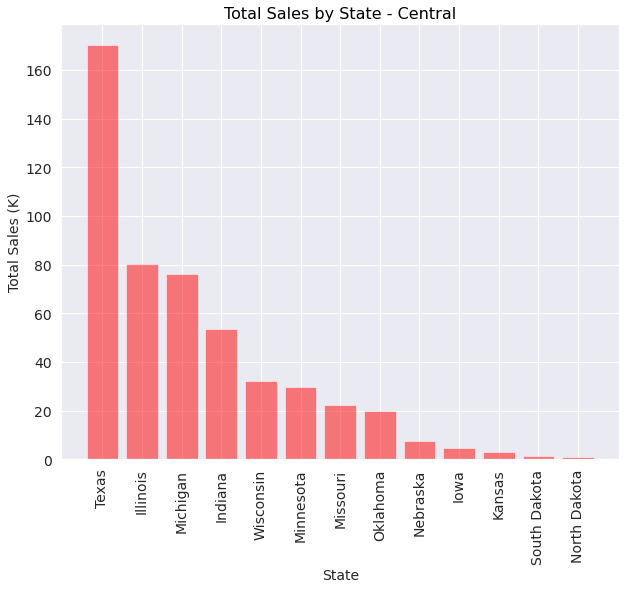

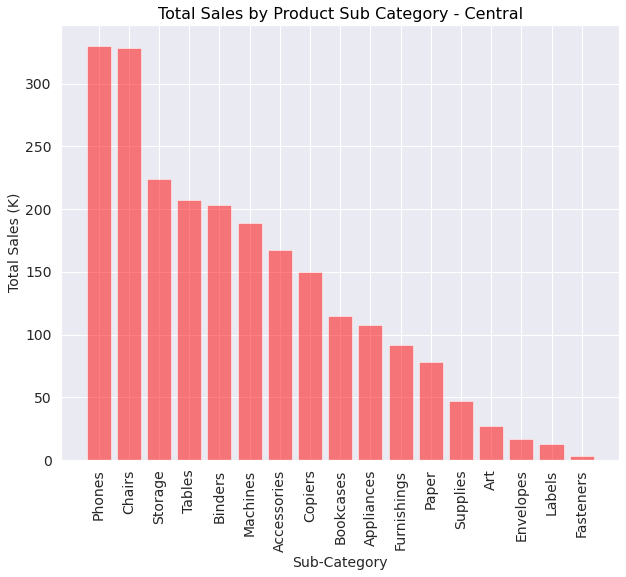

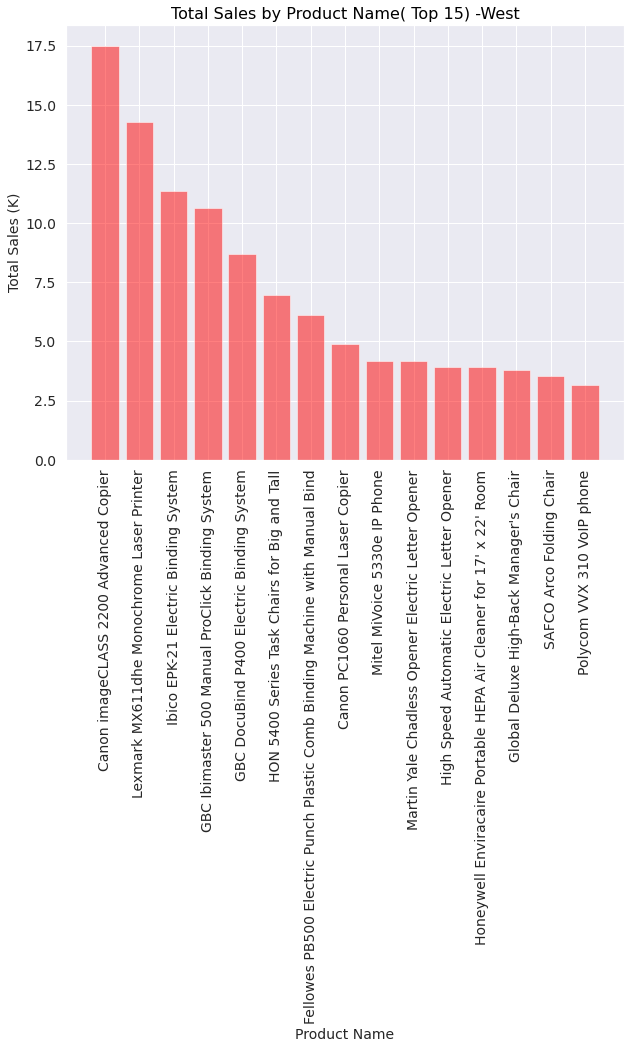

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


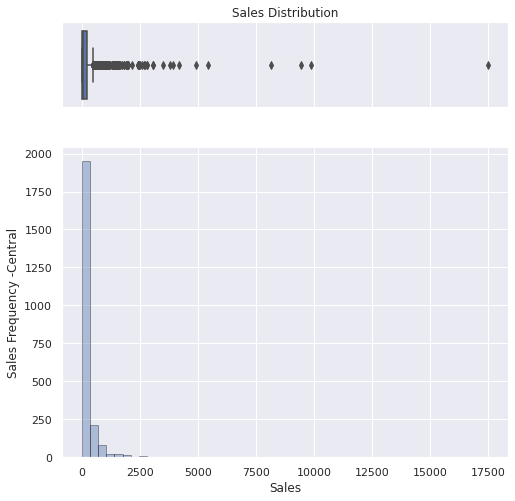

In [102]:
sns.set(rc={"figure.figsize":(8, 8)}) 
df_regions=df[df['Region'] == regions[2]]
segment_sales=group_plot(df_regions,'State','Sales') 
plot_bar(segment_sales,'State','Total Sales','Total Sales (K)','State','Total Sales by State - '+ regions[2] )
sub_category_sales=group_plot(df,'Sub-Category','Sales') 
    
plot_bar(sub_category_sales,'Sub-Category','Total Sales','Total Sales (K)','Sub-Category','Total Sales by Product Sub Category - '+ regions[2])

prod_name_sales=group_plot(df_regions,'Product Name','Sales') 
    
plot_bar(prod_name_sales[0:15],'Product Name','Total Sales','Total Sales (K)','Product Name','Total Sales by Product Name( Top 15) -' + regions[0])

box_hist_plot(df_regions,"Sales","Sales Distribution","Sales Frequency -"+ regions[2])

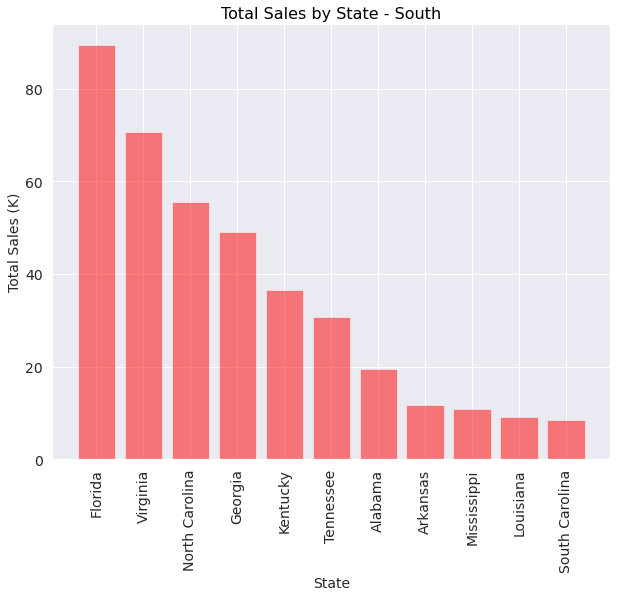

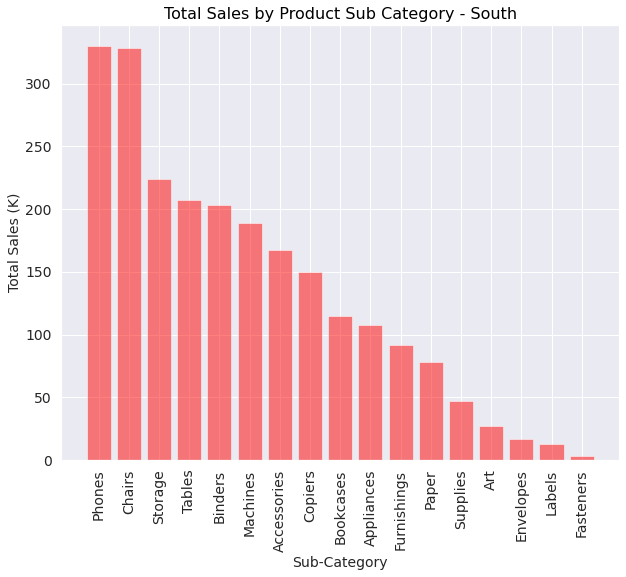

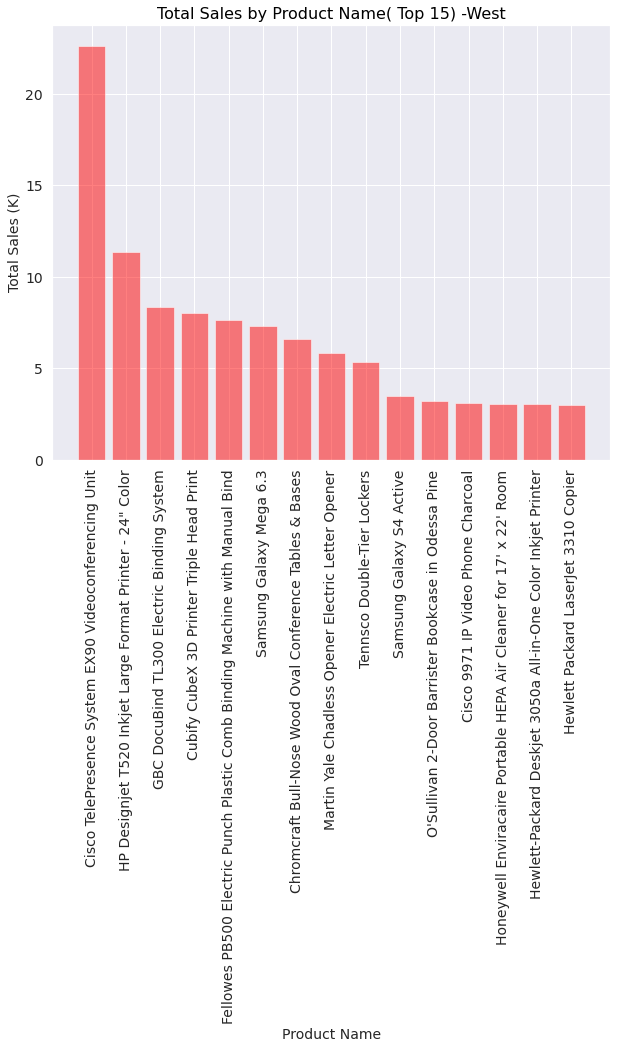

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


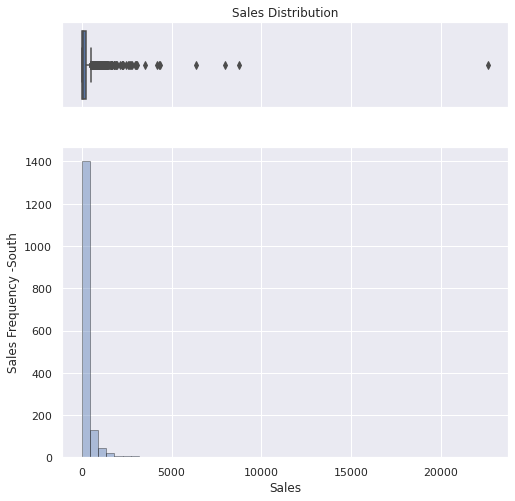

In [103]:
sns.set(rc={"figure.figsize":(8, 8)}) 
df_regions=df[df['Region'] == regions[3]]
segment_sales=group_plot(df_regions,'State','Sales') 
plot_bar(segment_sales,'State','Total Sales','Total Sales (K)','State','Total Sales by State - '+ regions[3] )
sub_category_sales=group_plot(df,'Sub-Category','Sales') 
    
plot_bar(sub_category_sales,'Sub-Category','Total Sales','Total Sales (K)','Sub-Category','Total Sales by Product Sub Category - '+ regions[3])

prod_name_sales=group_plot(df_regions,'Product Name','Sales') 
    
plot_bar(prod_name_sales[0:15],'Product Name','Total Sales','Total Sales (K)','Product Name','Total Sales by Product Name( Top 15) -' + regions[0])

box_hist_plot(df_regions,"Sales","Sales Distribution","Sales Frequency -"+ regions[3])

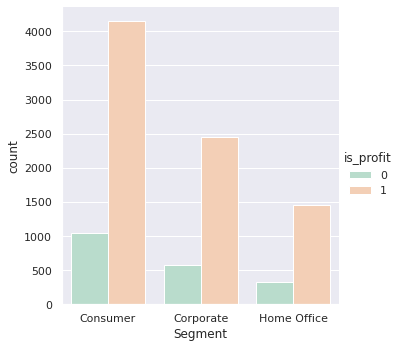

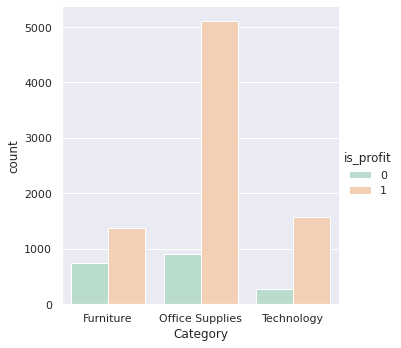

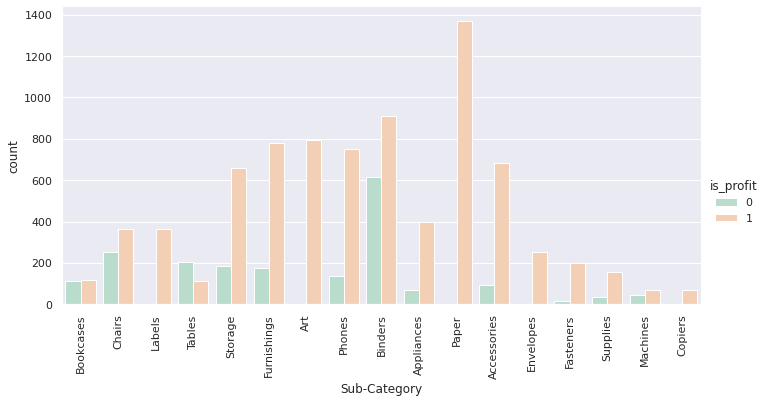

In [104]:
sns.set(rc={"figure.figsize":(8, 8)}) 
g=sns.catplot(x="Segment",hue="is_profit", data=df, kind="count",height=5, aspect=1, estimator=sum,palette="Pastel2")

sns.set(rc={"figure.figsize":(8, 8)}) 
g=sns.catplot(x="Category",hue="is_profit", data=df, kind="count",height=5, aspect=1, estimator=sum,palette="Pastel2")

sns.set(rc={"figure.figsize":(16, 16)}) 
g=sns.catplot(x="Sub-Category",hue="is_profit", data=df, kind="count",height=5, aspect=2, estimator=sum,palette="Pastel2")
g.set_xticklabels(rotation=90)

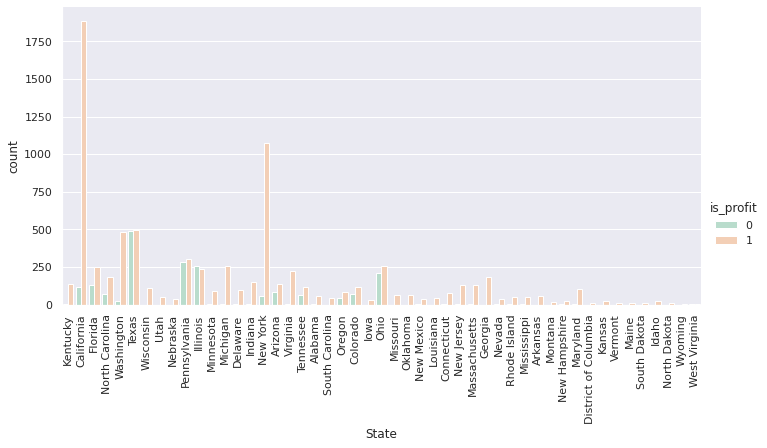

In [105]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=3, #height=4
g=sns.catplot(x="State",hue="is_profit", data=df, kind="count",height=5, aspect=2, estimator=sum,palette="Pastel2")
g.set_xticklabels(rotation=90)